### Hotel Reservations: 

Our dataset comes from Kaggle and can be found at the following link: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

The dataset contains roughly 36,300 instances, each representing an individual hotel reservation. There are 19 features, which are the attributes of customers' hotel reservations. The features are as follows: Booking_ID, no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled. avg_price_per_room, no_of_special_requests, and booking_status. 

Our target variable is booking_status, which is defined in the dataset information as a "flag indicating if the booking was canceled or not." We chose this feature as our target variable because the aim of our project is to determine the likelihood of a booking being canceled and which features are the best predictors of this cancellation. 

In [102]:
import pandas as pd

hotel_data = pd.read_csv('./Hotel Reservations.csv')

In [103]:
hotel_data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.000000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.680000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.000000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.000000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.500000,0,Canceled


In [104]:
print(hotel_data.shape)

(36275, 19)


In [105]:
# find missing values
print(hotel_data.isnull().sum())

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


There are no missing values.

In [106]:
print(hotel_data.dtypes)

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object


Some features, and even the target variable, are not numerical. We will need to make these values numerical in preprocessing.

### Pre-processing

In [107]:
# make Booking_ID an integer
hotel_data['Booking_ID'] = hotel_data['Booking_ID'].apply(lambda x: int(x[3:]))

In [108]:
# Use one-hot encoding to convert categorical data into numerical
# data. This introduces new features into the dataset.
hotel_data = pd.get_dummies(hotel_data, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'])

In [109]:
print(hotel_data.columns)

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')


In [110]:
# Transform the booking_status by mapping to a binary encoding.
hotel_data['booking_status'] = hotel_data['booking_status'].map({'Canceled': 0, 'Not_Canceled': 1})

print(hotel_data.dtypes)


Booking_ID                                int64
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
type_of_meal_plan_Meal Plan 1              bool
type_of_meal_plan_Meal Plan 2              bool
type_of_meal_plan_Meal Plan 3              bool
type_of_meal_plan_Not Selected             bool
room_type_reserved_Room_Type 1          

All fields are now numerical.

### Correlation Analysis

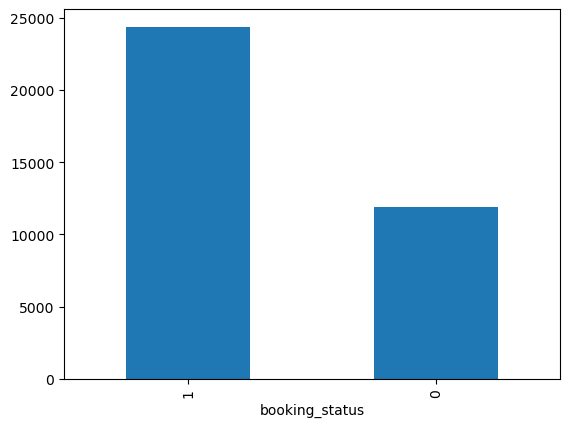

In [111]:
import matplotlib.pyplot as plt

hotel_data['booking_status'].value_counts().plot(kind='bar')

plt.show()

32.8% of all reservations are cancelled. Although not perfectly balanced with respect to the target variable, this skew is not too servere. Given a more severe skew or should we believe this an issue going forward, we could consider employing techniques such as under/over sampling to address the imbalance.

In [112]:
corr = hotel_data.corr()
print(corr['booking_status'].sort_values(ascending=False))

booking_status                          1.000000
no_of_special_requests                  0.253070
market_segment_type_Corporate           0.112993
repeated_guest                          0.107287
required_car_parking_space              0.086185
market_segment_type_Complementary       0.072867
type_of_meal_plan_Meal Plan 1           0.061267
no_of_previous_bookings_not_canceled    0.060179
market_segment_type_Offline             0.038351
no_of_previous_cancellations            0.033728
room_type_reserved_Room_Type 1          0.020326
room_type_reserved_Room_Type 7          0.014062
arrival_month                           0.011233
room_type_reserved_Room_Type 5          0.010224
market_segment_type_Aviation            0.003964
type_of_meal_plan_Meal Plan 3           0.003193
room_type_reserved_Room_Type 3          0.001241
room_type_reserved_Room_Type 2         -0.000548
type_of_meal_plan_Not Selected         -0.003072
Booking_ID                             -0.006237
arrival_date        

Features such as Booking_ID and arrival_date have little to no correlation with our target variable. Features such as lead_time and no_of_special_requests have stronger correlations to our target variable. For lead_time, there is a negative correlation between this feature and the binary target varible. Keeping in mind that 1 signifies a non-canceled booking, as lead_time increases, the booking is more likely to be canceled.

Another set of features worth examining are the 5 varieties market_segement_types. Some market types such as coperate, complimentary, offline, and aviation have positive correlations to the target variable, while segement type online has a negative correlation. This suggests various relationships between the type of reservation and whether the reservation was canceled or not. One such relationship is that online bookings are more likely to be canceled than in-person bookings.

In [113]:
import matplotlib.pyplot as plt

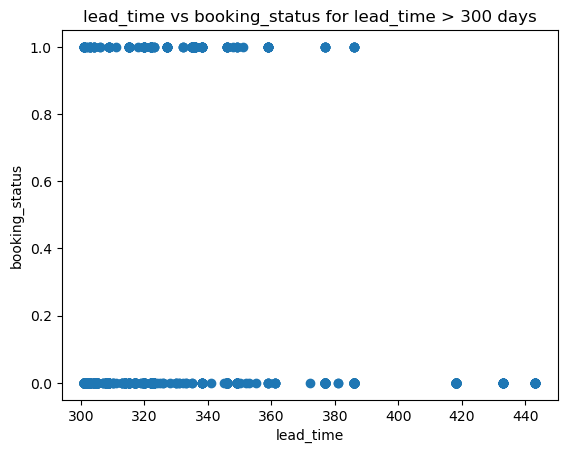

In [114]:
large_lead_time_data = hotel_data[hotel_data['lead_time'] > 300]

plt.scatter(large_lead_time_data['lead_time'], large_lead_time_data['booking_status'])
plt.xlabel('lead_time')
plt.ylabel('booking_status')
plt.title('lead_time vs booking_status for lead_time > 300 days')
plt.show()


Taking a closer look at lead time, we can start to visualize the negative correlation between lead_time and booking_status. Reservations done further in advance are more likely to be cancelled.

### Short Analysis of arrival_month and arrival_date

We were not sure whether or not there was any significance to the arrival_month or arrival_date so we would know if we should do a cyclical encoding or not.

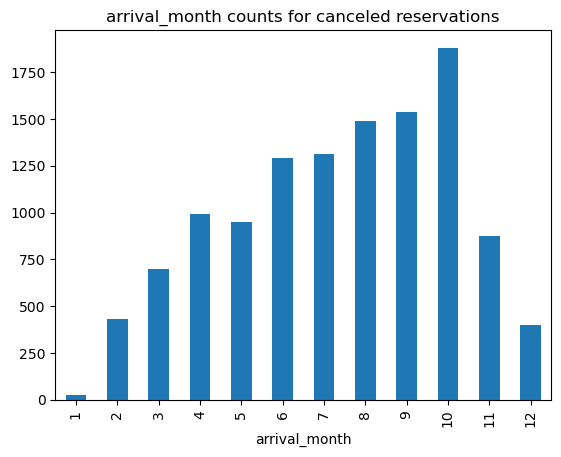

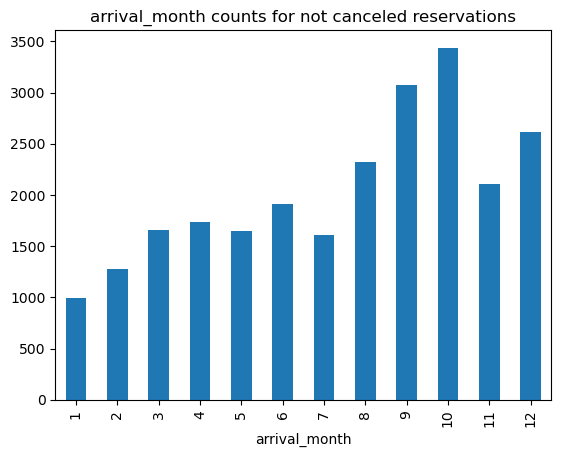

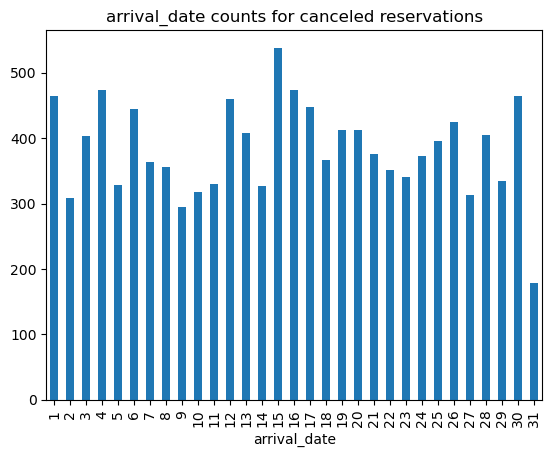

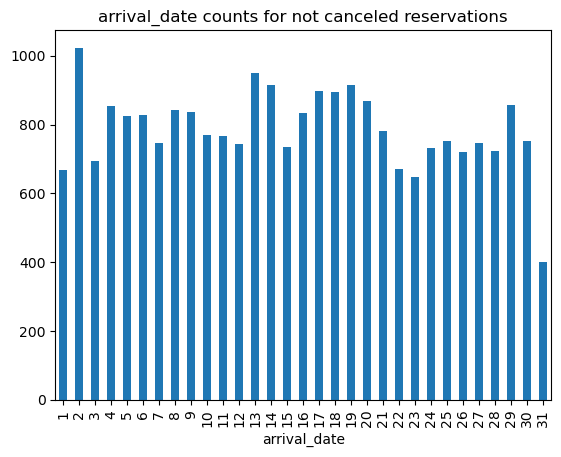

In [115]:
hotel_data_cancelled = hotel_data[hotel_data['booking_status'] == 0]
hotel_data_not_cancelled = hotel_data[hotel_data['booking_status'] == 1]

hotel_data_cancelled['arrival_month'].value_counts().sort_index().plot(kind='bar')
plt.title('arrival_month counts for canceled reservations')
plt.show()
hotel_data_not_cancelled['arrival_month'].value_counts().sort_index().plot(kind='bar')
plt.title('arrival_month counts for not canceled reservations')
plt.show()
hotel_data_cancelled['arrival_date'].value_counts().sort_index().plot(kind='bar')
plt.title('arrival_date counts for canceled reservations')
plt.show()
hotel_data_not_cancelled['arrival_date'].value_counts().sort_index().plot(kind='bar')
plt.title('arrival_date counts for not canceled reservations')
plt.show()

From looking at these graphs and comparing the number of bookings kept per month and the number of bookings cancelled per month, it looks like the only two months that might have any significance would be January and December. However, all of the other months look like there is no significance, so it does not make sense to use or make cyclical. Looking at the number of bookings for arrival date kept vs number of bookings canceled for arrival date, it does not look like there is any significance between days of the month, so it is unnecessary and not helpful to the model to keep these variables.

In [116]:
hotel_data.drop(['arrival_month', 'arrival_date', 'Booking_ID', 'arrival_year'], axis=1, inplace=True)

### PCA Dimensionality Reduction 

Since the hotel reservations dataset contains a large number of features, we continue by using PCA (principal component analysis) for dimensionality reduction. For our initial implementation, we start by reducing to 2 dimensions to get an initial sense for the data (and because a dimensionality of 2 is appropriate for data visualization). 

In [117]:
# initial implementation (2 dimensions)
from sklearn.decomposition import PCA

# create feature set X and target variable y
X = hotel_data.drop('booking_status', axis=1)
y = hotel_data['booking_status']

pca = PCA(n_components=2)
hotal2D = pca.fit_transform(X)

print(hotal2D)

[[139.88061933 -34.15987709]
 [-80.2923924    0.80086204]
 [-82.86485553 -45.98627595]
 ...
 [ 62.90002595  -3.0954772 ]
 [-21.94692664  -9.59995597]
 [119.92749361  61.93664024]]


In [118]:
print(pca.explained_variance_ratio_)

[0.85694104 0.14212837]


The explained variance ratio indicates the proportion of a dataset's variance explained by each principal component. The results show that the first principal component in the hotel reservations dataset accounts for the majority of the variance (86%) and the second accounts for 14%.

Next, we implement PCA with the optimal number of dimensions. In this case, we reduce down to the number of dimensions accounting for 95% of the variance.

In [119]:
# implementation with optimal number of dimensions 
import numpy as np

pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

print(pca.n_components_)

2



The optimal number of dimensions for this dataset is merely two. This is expected based on the explained variance ratio, and it indicates that the vast majority of the variance in the hotel reservations dataset can be explained by two principal components. Next, it is useful to know what these principal components are, so we will examine the feature contributions for each of the first two.

In [120]:
pd.set_option('display.float_format', '{:.6f}'.format)
feature_names = list(X.columns)

df_pca_components = pd.DataFrame(pca.components_, columns=feature_names)
df_pca_components = df_pca_components.transpose()
df_pca_components.columns = [f'Principal Component {i+1}' for i in range(len(df_pca_components.columns))]

df_sorted_1 = df_pca_components.abs().sort_values(by='Principal Component 1', ascending=False)
df_sorted_1 = df_sorted_1[['Principal Component 1']]
print(df_sorted_1)

                                      Principal Component 1
lead_time                                          0.999523
avg_price_per_room                                 0.030632
no_of_week_nights                                  0.002450
no_of_previous_bookings_not_canceled               0.001565
market_segment_type_Offline                        0.001492
no_of_special_requests                             0.000950
market_segment_type_Online                         0.000880
type_of_meal_plan_Meal Plan 2                      0.000764
no_of_adults                                       0.000564
type_of_meal_plan_Not Selected                     0.000495
room_type_reserved_Room_Type 1                     0.000487
market_segment_type_Corporate                      0.000472
no_of_weekend_nights                               0.000472
room_type_reserved_Room_Type 4                     0.000377
type_of_meal_plan_Meal Plan 1                      0.000267
repeated_guest                          

In [121]:
df_sorted_2 = df_pca_components.abs().sort_values(by='Principal Component 2', ascending=False)
df_sorted_2 = df_sorted_2[['Principal Component 2']]
print(df_sorted_2)

                                      Principal Component 2
avg_price_per_room                                 0.999454
lead_time                                          0.030629
no_of_previous_bookings_not_canceled               0.006017
room_type_reserved_Room_Type 1                     0.004662
no_of_adults                                       0.004517
market_segment_type_Online                         0.004454
no_of_special_requests                             0.003980
no_of_children                                     0.003851
room_type_reserved_Room_Type 4                     0.002912
market_segment_type_Offline                        0.002519
room_type_reserved_Room_Type 6                     0.001695
no_of_week_nights                                  0.001376
type_of_meal_plan_Not Selected                     0.001074
type_of_meal_plan_Meal Plan 2                      0.001025
market_segment_type_Corporate                      0.001019
market_segment_type_Complementary       

These results demonstrate that the first principal feature is taking into account primarily lead time, then average price per room, and the second principal feature is taking into account the same features but in the opposite order. This provides insight into which features are most influential in our model (which features are higher predictors of hotel reservation cancellation). 

### Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

log_reg_coefficients = log_reg.coef_
coefficients_df = pd.DataFrame(log_reg_coefficients, columns=X.columns)
print("Coefficients:")
print(coefficients_df)

Coefficients:
   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0     -0.056202       -0.058754             -0.112828          -0.040708   

   required_car_parking_space  lead_time  repeated_guest  \
0                    0.293952  -1.342494        0.364251   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                     -0.099010                              0.110753   

   avg_price_per_room  ...  room_type_reserved_Room_Type 3  \
0           -0.658787  ...                       -0.016005   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                        0.009508                        0.036232   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                        0.126637                        0.075422   

   market_segment_type_Aviation  market_segment_type_Complementary  \
0                     -0.061481                           0.602212   

   market_segment_typ

Testing accuracy, Precision and recall

In [123]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
y_pred = log_reg.predict(X_test_scaled)

print(f' classification report: \n {classification_report(y_test, y_pred)}')


MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print("MSE:", MSE)
print("R2:", R2)
print("MAE:", MAE)

 classification report: 
               precision    recall  f1-score   support

           0       0.76      0.61      0.67      3026
           1       0.82      0.90      0.86      6043

    accuracy                           0.80      9069
   macro avg       0.79      0.76      0.77      9069
weighted avg       0.80      0.80      0.80      9069

MSE: 0.19572168927114345
R2: 0.1196887715588405
MAE: 0.19572168927114345


### Linear and Nonlinear SVM Classification

We begin our classification by utilizing SVMs (support vector machines) to perform linear classification. We will use soft margin classification to account for outliers and add flexibility in our model. We use LinearSVC from Scikit-Learn to accomplish this,

In [124]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, dual=True, max_iter=5000, random_state=42))
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)



/Users/ethanernst/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [125]:
from sklearn import metrics 
from sklearn.metrics import classification_report

print(f' classification report: \n {classification_report(y_test, y_pred)}')

MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print("MSE:", MSE)
print("R2:", R2)
print("MAE:", MAE)

 classification report: 
               precision    recall  f1-score   support

           0       0.75      0.60      0.67      3026
           1       0.82      0.90      0.86      6043

    accuracy                           0.80      9069
   macro avg       0.79      0.75      0.76      9069
weighted avg       0.80      0.80      0.80      9069

MSE: 0.19781673833939795
R2: 0.11026572178961114
MAE: 0.19781673833939795


Training a basic linear SVM results in an accuracy of roughly 80%, which is a good start, but improved accuracy would be beneficial.

As noted by the ConvergenceWarning, the model fails to converge even with increased iterations. Considering this and the graph of lead_time vs booking_status, the data does not appear to be linearly separable. So, in addition to the linear SVM, we will also try a nonlinear SVM for comparison.

In [126]:
# trying polynomial kernel

from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3, coef0=1, C=5))

poly_kernel_svm_clf.fit(X_train, y_train)

y_pred = poly_kernel_svm_clf.predict(X_test)

In [127]:
print(f' classification report: \n {classification_report(y_test, y_pred)}')

MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print("MSE:", MSE)
print("R2:", R2)
print("MAE:", MAE)

 classification report: 
               precision    recall  f1-score   support

           0       0.81      0.63      0.71      3026
           1       0.83      0.93      0.88      6043

    accuracy                           0.83      9069
   macro avg       0.82      0.78      0.79      9069
weighted avg       0.82      0.83      0.82      9069

MSE: 0.17433013562686073
R2: 0.2159030692025503
MAE: 0.17433013562686073


The nonlinear SVM performs with a slightly higher but similar accuracy of roughly 83%. These starting accuracies indicate SVM may not be the best choice for our dataset, either linear or nonlinear. To find a model with better accuracy, we will examine more models better suited to our dataset. Next, we will look at the Decision Tree Classifier. 

### Decision Tree Classifier

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# use grid search to find the best hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(10, 15),
    'min_samples_split': range(2, 5),
    'min_samples_leaf': range(1, 5)
}

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']

{'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [129]:
clf = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f' confusion matrix: \n {confusion_matrix(y_test, y_pred)}\n\n')
print(f' classification report: \n {classification_report(y_test, y_pred)}')

MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print("MSE:", MSE)
print("R2:", R2)
print("MAE:", MAE)

 confusion matrix: 
 [[2356  670]
 [ 515 5528]]


 classification report: 
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      3026
           1       0.89      0.91      0.90      6043

    accuracy                           0.87      9069
   macro avg       0.86      0.85      0.85      9069
weighted avg       0.87      0.87      0.87      9069

MSE: 0.1306649024148197
R2: 0.4122992643928034
MAE: 0.1306649024148197


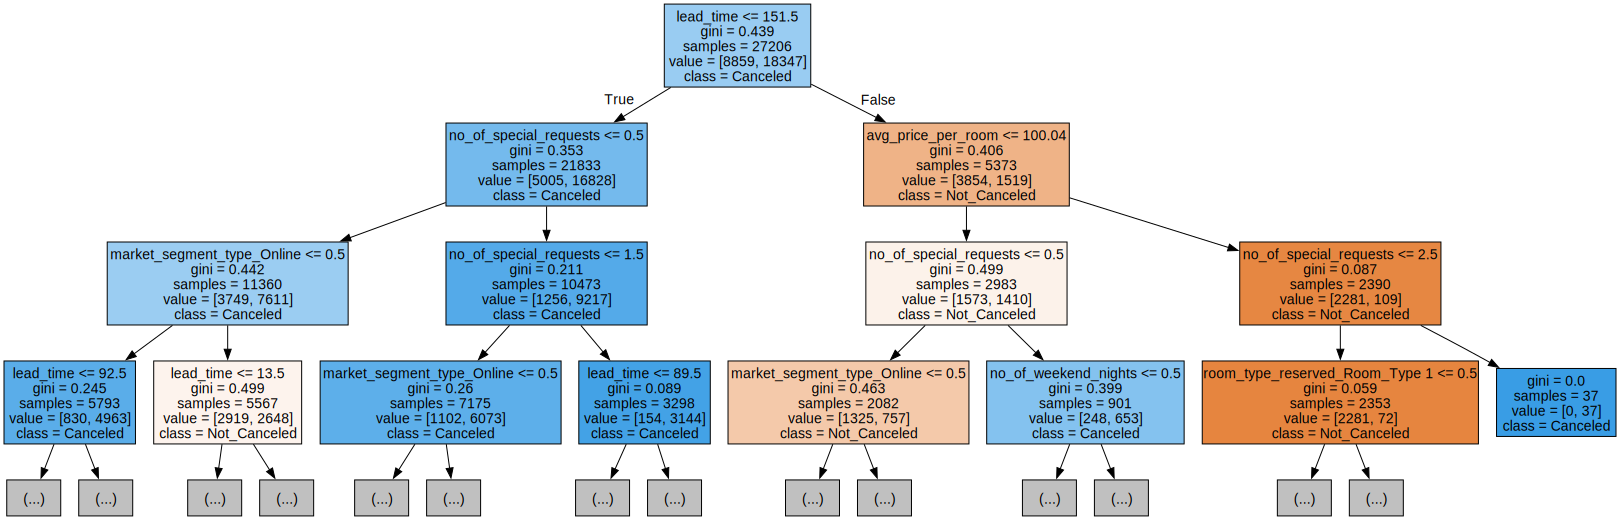

In [130]:
# Visualize the decision tree
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(clf, out_file='tree.dot', feature_names=X.columns, class_names=['Not_Canceled', 'Canceled'], filled=True, max_depth=3)

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [131]:
# Feature importance based on gini impurity
features_importances  = clf.feature_importances_

features_importances_dict = {index: item for index, item in enumerate(features_importances)}
sorted_features_importances = sorted(features_importances_dict.items(), key=lambda x: x[1], reverse=True)

print("Top 5 features based on gini impurity:")
for i in range(5):
    print(X.columns[sorted_features_importances[i][0]], sorted_features_importances[i][1])

Top 5 features based on gini impurity:
lead_time 0.4188807409494944
avg_price_per_room 0.2070442090310223
market_segment_type_Online 0.13956310487694915
no_of_special_requests 0.09885141717411014
no_of_week_nights 0.03533110248166085


As seen here, lead_time and avg_price_per_room are the top 2 features for the decision tree. This aligns with our findings in the PCA dimensionality reduction, in which these were most heavily weighted features for the first two principal components.

#### Decision Tree With PCA

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, random_state=42)


#grid search to find the best hyperparameters
param_grid = {
    'max_depth': range(10, 15),
    'min_samples_split': range(2, 5),
    'min_samples_leaf': range(1, 5)
}

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']



{'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [133]:
clf = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f' confusion matrix: \n {confusion_matrix(y_test, y_pred)}\n\n')
print(f' classification report: \n {classification_report(y_test, y_pred)}')

MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print("MSE:", MSE)
print("R2:", R2)
print("MAE:", MAE)

 confusion matrix: 
 [[1610 1416]
 [ 439 5604]]


 classification report: 
               precision    recall  f1-score   support

           0       0.79      0.53      0.63      3026
           1       0.80      0.93      0.86      6043

    accuracy                           0.80      9069
   macro avg       0.79      0.73      0.75      9069
weighted avg       0.79      0.80      0.78      9069

MSE: 0.2045429485058992
R2: 0.08001277253050654
MAE: 0.2045429485058992


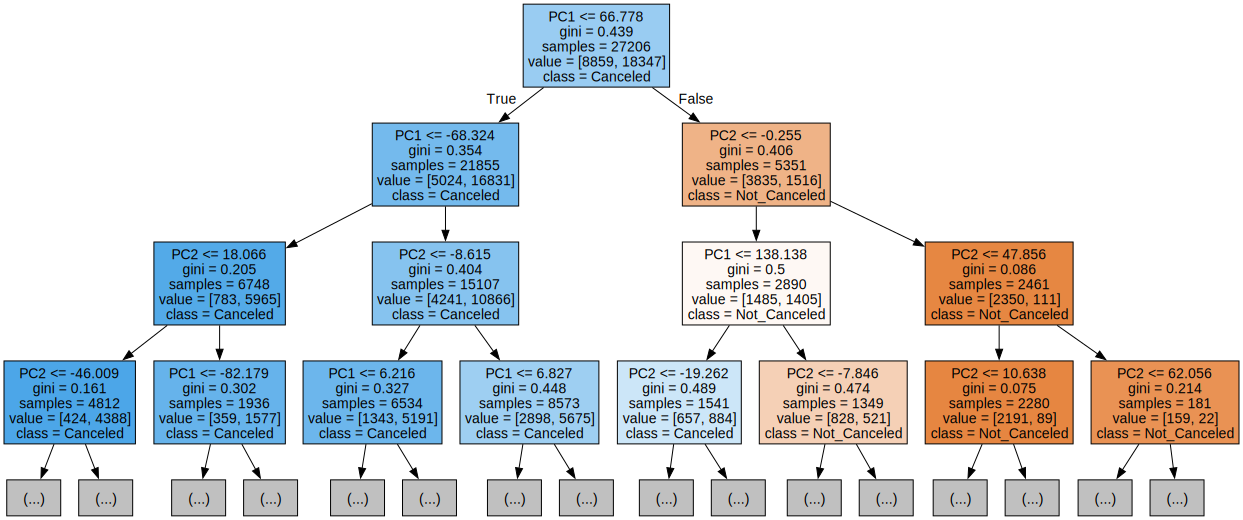

In [134]:
export_graphviz(clf, out_file='treePCA.dot', feature_names=["PC1", "PC2"], class_names=['Not_Canceled', 'Canceled'], filled=True, max_depth=3)

with open('treePCA.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)